In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Import Dataset
movies = pd.read_csv('./dataset/movies.csv')
ratings = pd.read_csv('./dataset/ratings.csv')
links = pd.read_csv('./dataset/links.csv')
tags = pd.read_csv('./dataset/tags.csv')

In [3]:
# Print out each dataset size
print(movies.shape)
print(ratings.shape)
print(tags.shape)
print(links.shape)

(9742, 3)
(100836, 4)
(3683, 4)
(9742, 3)


In [4]:
# Print movie dataset
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [6]:
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [7]:
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [8]:
# Get a list of the features within the dataset
print("Movie: ", movies.columns, end="\n\n")
print("Rating: ", ratings.columns, end="\n\n")
print("Links: ", links.columns, end="\n\n")
print("Tags: ", tags.columns, end="\n\n")

Movie:  Index(['movieId', 'title', 'genres'], dtype='object')

Rating:  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Links:  Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Tags:  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')



In [9]:
movies.info()
ratings.info()
tags.info()
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

In [10]:
# Droping the timestamp column from ratings and tags file
ratings.drop(columns='timestamp', inplace=True)
tags.drop(columns='timestamp', inplace=True)

In [11]:
ratings.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [12]:
tags.head(3)

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell


In [13]:
# Descriptive Analytics and Visualization
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*', expand = False)

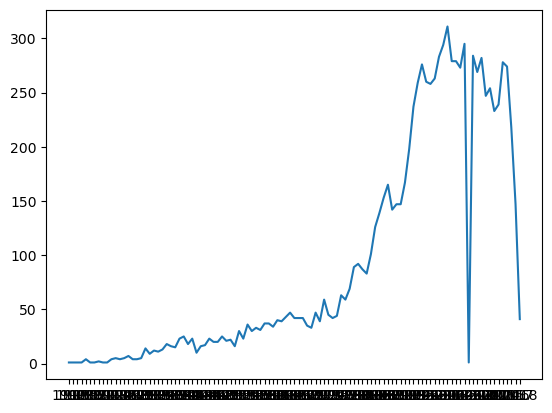

In [14]:
# Plotting a Graph with No.of Movies each year corresponding to its Year
plt.plot(movies.groupby('Year').title.count())
plt.show()

In [15]:
a = movies.groupby('Year').title.count()
print("Max Number of Movies Released = ", a.max())
for i in a.index:
    if a[i] == a.max():
        print("Year = ", i)
a.describe()

Max Number of Movies Released =  311
Year =  2002


count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [16]:
# Sepearte the Genres Column and Encoding them with One-Hot-Encoding Method
genres = []
for i in range(len(movies.genres)):
    for x in movies.genres[i].split("|"):
        if x not in genres:
            genres.append(x)

In [17]:
len(genres)
for x in genres:
    movies[x] = 0
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies[x][i]=1

In [18]:
movies

,movieId,title,genres,Year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Drop the Genres Column from movies
movies.drop(columns='genres',inplace=True)
movies.sort_index(inplace=True)

In [20]:
movies

,movieId,title,Year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),2017,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),2017,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),2017,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),2018,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# print each genres count
x = {}
for i in movies.columns[4:23]:
    x[i]=movies[i].value_counts()[1]
    print("{} \t\t\t\t{}".format(i, x[i]))

Animation 				611
Children 				664
Comedy 				3756
Fantasy 				779
Romance 				1596
Drama 				4361
Action 				1828
Crime 				1199
Thriller 				1894
Horror 				978
Mystery 				573
Sci-Fi 				980
War 				382
Musical 				334
Documentary 				440
IMAX 				158
Western 				167
Film-Noir 				87
(no genres listed) 				34


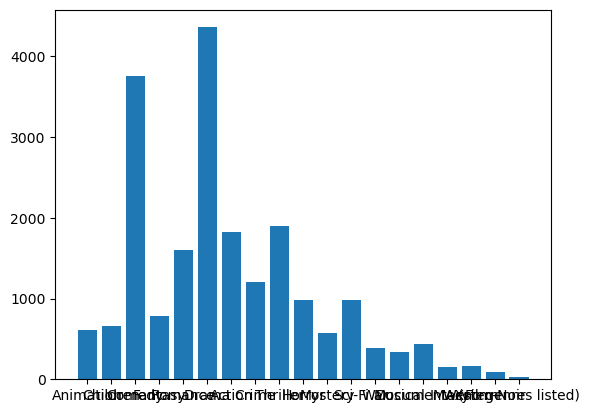

In [22]:
# Plot genres count in graph
plt.bar(height=x.values(), x=x.keys())
plt.show()

In [23]:
# Group user by "movieId" and rate each movie with the mean of the Rating given
x = ratings.groupby('movieId').rating.mean()
movies = pd.merge(movies,x,how='outer',on='movieId')
movies['rating'].fillna('0',inplace=True)

In [24]:
# Group all the ratings with respect to movieId and count the no of Users
x = ratings.groupby('movieId',as_index=False).userId.count()
x.sort_values('userId',ascending=False,inplace=True)
y = pd.merge(movies,x,how='outer',on='movieId')

y.drop(columns=[i for i in movies.columns[2:23]],inplace=True)
y.sort_values(['userId','rating'],ascending=False)

,movieId,title,rating,userId
314,356,Forrest Gump (1994),4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",4.429022,317.0
257,296,Pulp Fiction (1994),4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",4.16129,279.0
1939,2571,"Matrix, The (1999)",4.192446,278.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),0,NaN
5824,32160,Twentieth Century (1934),0,NaN
5837,32371,Call Northside 777 (1948),0,NaN
5957,34482,"Browning Version, The (1951)",0,NaN


In [25]:
# Find the user with Highest number of movie ratings and that users mean rating
x = ratings.groupby('userId', as_index=False).movieId.count()
y = ratings.groupby('userId', as_index=False).rating.mean()
x = pd.merge(x , y, how='outer', on='userId')

In [26]:
x.describe()

,userId,movieId,rating
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


In [27]:
x.sort_values('movieId', ascending=False)

,userId,movieId,rating
413,414,2698,3.391957
598,599,2478,2.642050
473,474,2108,3.398956
447,448,1864,2.847371
273,274,1346,3.235884
...,...,...,...
441,442,20,1.275000
568,569,20,4.000000
319,320,20,3.525000
575,576,20,3.100000


In [28]:
movies.head(5)
df = pd.DataFrame(movies)

In [29]:
print(links["tmdbId"])
tmdbId = links["tmdbId"]
print(tmdbId)
print(len(tmdbId))

0          862.0
1         8844.0
2        15602.0
3        31357.0
4        11862.0
          ...   
9737    432131.0
9738    445030.0
9739    479308.0
9740    483455.0
9741     37891.0
Name: tmdbId, Length: 9742, dtype: float64
0          862.0
1         8844.0
2        15602.0
3        31357.0
4        11862.0
          ...   
9737    432131.0
9738    445030.0
9739    479308.0
9740    483455.0
9741     37891.0
Name: tmdbId, Length: 9742, dtype: float64
9742


In [30]:
import requests
import pandas as pd
import concurrent.futures
import torch

# Initialize new columns in the DataFrame
df['vote_average'] = 0
df['vote_count'] = 0
df['popularity'] = 0
df['revenue'] = 0
df['budget'] = 0

counter = 0

# 定义API的URL
api_url = "https://api.themoviedb.org/3/movie/"

# 定义你的API密钥
api_key = "32383af56afa244dbcd45da180ada9d3"

def fetch_movie_data(i):
    global counter
    
    # Define the movie ID you want to query
    movie_id = links.loc[i, 'tmdbId']

    # Use a GET request to call the API and get the JSON response
    response = requests.get(api_url + str(movie_id) + "?api_key=" + api_key)
    data = response.json()

    # Update the DataFrame with the new data
    df.loc[i, 'vote_average'] = data["vote_average"]
    df.loc[i, 'vote_count'] = data["vote_count"]
    df.loc[i, 'popularity'] = data["popularity"]
    df.loc[i, 'revenue'] = data["revenue"]
    df.loc[i, 'budget'] = data["budget"]
    
    counter += 1
    print(f"Loop has run {counter} times")

# Create a ThreadPoolExecutor
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Use the executor to map the function to the data
    executor.map(fetch_movie_data, range(len(df)))
# for i in range(9742):
#     print(i)
#     # 定义你想要查询的电影ID
#     movie_id = str(int(tmdbId[i]))
    
    

#     # 用GET请求调用API并获取JSON响应
#     response = requests.get(api_url + movie_id + "?api_key=" + api_key)
#     data = response.json()

#     df.loc[i, 'vote_average'] = data["vote_average"]
#     df.loc[i, 'vote_count'] = data["vote_count"]
#     df.loc[i, 'popularity'] = data["popularity"]
#     df.loc[i, 'revenue'] = data["revenue"]
#     df.loc[i, 'budget'] = data["budget"]
    
# # # 从JSON数据创建一个pandas数据框
# # df = pd.DataFrame(data, index=[0])

# # # 打印数据框
# # print(df)

# # # 向数据框添加一些属性
# # # 例如，添加一个列，表示电影的类型数量
# # m['num_genres'] = df['genres'].apply(len)

# # # 打印更新后的数据框
# # print(df)

# print(movies[: 5])

Loop has run 1 times
Loop has run 2 times
Loop has run 3 times
Loop has run 4 times
Loop has run 5 times
Loop has run 6 times
Loop has run 7 times
Loop has run 8 times
Loop has run 9 times
Loop has run 10 times
Loop has run 11 times
Loop has run 12 times
Loop has run 13 times
Loop has run 14 times
Loop has run 15 times
Loop has run 16 times
Loop has run 17 timesLoop has run 18 times
Loop has run 19 times
Loop has run 20 times
Loop has run 21 times
Loop has run 22 times

Loop has run 23 times
Loop has run 24 times
Loop has run 25 times
Loop has run 26 times
Loop has run 27 times
Loop has run 28 times
Loop has run 29 times
Loop has run 30 times
Loop has run 31 times
Loop has run 32 times
Loop has run 33 times
Loop has run 34 times
Loop has run 35 times
Loop has run 36 times
Loop has run 37 times
Loop has run 38 times
Loop has run 39 times
Loop has run 40 times
Loop has run 41 times
Loop has run 42 times
Loop has run 43 times
Loop has run 44 times
Loop has run 45 times
Loop has run 46 tim

Loop has run 362 times
Loop has run 363 times
Loop has run 364 times
Loop has run 365 times
Loop has run 366 times
Loop has run 367 times
Loop has run 368 times
Loop has run 369 times
Loop has run 370 times
Loop has run 371 times
Loop has run 372 times
Loop has run 373 times
Loop has run 374 times
Loop has run 375 times
Loop has run 376 times
Loop has run 377 times
Loop has run 378 times
Loop has run 379 times
Loop has run 380 times
Loop has run 381 times
Loop has run 382 times
Loop has run 383 times
Loop has run 384 times
Loop has run 385 times
Loop has run 386 times
Loop has run 387 times
Loop has run 388 times
Loop has run 389 times
Loop has run 390 times
Loop has run 391 times
Loop has run 392 times
Loop has run 393 times
Loop has run 394 times
Loop has run 395 times
Loop has run 396 times
Loop has run 397 times
Loop has run 398 timesLoop has run 399 times
Loop has run 400 times
Loop has run 401 times

Loop has run 402 times
Loop has run 403 times
Loop has run 404 times
Loop has ru

Loop has run 720 times
Loop has run 721 times
Loop has run 722 times
Loop has run 723 times
Loop has run 724 times
Loop has run 725 times
Loop has run 726 times
Loop has run 727 times
Loop has run 728 times
Loop has run 729 times
Loop has run 730 times
Loop has run 731 times
Loop has run 732 times
Loop has run 733 times
Loop has run 734 times
Loop has run 735 times
Loop has run 736 times
Loop has run 737 times
Loop has run 738 times
Loop has run 739 times
Loop has run 740 times
Loop has run 741 timesLoop has run 742 times
Loop has run 743 times
Loop has run 744 times

Loop has run 745 times
Loop has run 746 times
Loop has run 747 times
Loop has run 748 times
Loop has run 749 times
Loop has run 750 times
Loop has run 751 times
Loop has run 752 timesLoop has run 753 times
Loop has run 754 times
Loop has run 755 times

Loop has run 756 times
Loop has run 757 times
Loop has run 758 times
Loop has run 759 times
Loop has run 760 times
Loop has run 761 times
Loop has run 762 times
Loop has ru

Loop has run 1078 times
Loop has run 1079 times
Loop has run 1080 times
Loop has run 1081 times
Loop has run 1082 times
Loop has run 1083 times
Loop has run 1084 times
Loop has run 1085 times
Loop has run 1086 times
Loop has run 1087 times
Loop has run 1088 times
Loop has run 1089 times
Loop has run 1090 times
Loop has run 1091 times
Loop has run 1092 times
Loop has run 1093 times
Loop has run 1094 times
Loop has run 1095 times
Loop has run 1096 times
Loop has run 1097 times
Loop has run 1098 times
Loop has run 1099 times
Loop has run 1100 times
Loop has run 1101 times
Loop has run 1102 times
Loop has run 1103 times
Loop has run 1104 times
Loop has run 1105 times
Loop has run 1106 times
Loop has run 1107 times
Loop has run 1108 times
Loop has run 1109 times
Loop has run 1110 times
Loop has run 1111 times
Loop has run 1112 times
Loop has run 1113 times
Loop has run 1114 times
Loop has run 1115 times
Loop has run 1116 times
Loop has run 1117 times
Loop has run 1118 times
Loop has run 111

Loop has run 1430 times
Loop has run 1431 times
Loop has run 1432 times
Loop has run 1433 times
Loop has run 1434 times
Loop has run 1435 times
Loop has run 1436 times
Loop has run 1437 times
Loop has run 1438 times
Loop has run 1439 times
Loop has run 1440 times
Loop has run 1441 times
Loop has run 1442 times
Loop has run 1443 times
Loop has run 1444 times
Loop has run 1445 times
Loop has run 1446 times
Loop has run 1447 times
Loop has run 1448 times
Loop has run 1449 times
Loop has run 1450 times
Loop has run 1451 times
Loop has run 1452 times
Loop has run 1453 times
Loop has run 1454 times
Loop has run 1455 times
Loop has run 1456 times
Loop has run 1457 times
Loop has run 1458 times
Loop has run 1459 times
Loop has run 1460 times
Loop has run 1461 times
Loop has run 1462 times
Loop has run 1463 times
Loop has run 1464 times
Loop has run 1465 times
Loop has run 1466 times
Loop has run 1467 times
Loop has run 1468 times
Loop has run 1469 times
Loop has run 1470 times
Loop has run 147

Loop has run 1774 times
Loop has run 1775 times
Loop has run 1776 times
Loop has run 1777 times
Loop has run 1778 times
Loop has run 1779 times
Loop has run 1780 times
Loop has run 1781 times
Loop has run 1782 times
Loop has run 1783 times
Loop has run 1784 times
Loop has run 1785 times
Loop has run 1786 times
Loop has run 1787 times
Loop has run 1788 times
Loop has run 1789 times
Loop has run 1790 times
Loop has run 1791 times
Loop has run 1792 times
Loop has run 1793 times
Loop has run 1794 times
Loop has run 1795 times
Loop has run 1796 times
Loop has run 1797 times
Loop has run 1798 times
Loop has run 1799 times
Loop has run 1800 times
Loop has run 1801 times
Loop has run 1802 times
Loop has run 1803 times
Loop has run 1804 times
Loop has run 1805 times
Loop has run 1806 times
Loop has run 1807 times
Loop has run 1808 times
Loop has run 1809 times
Loop has run 1810 times
Loop has run 1811 times
Loop has run 1812 times
Loop has run 1813 times
Loop has run 1814 times
Loop has run 181

Loop has run 2119 times
Loop has run 2120 times
Loop has run 2121 times
Loop has run 2122 times
Loop has run 2123 times
Loop has run 2124 times
Loop has run 2125 times
Loop has run 2126 times
Loop has run 2127 times
Loop has run 2128 times
Loop has run 2129 times
Loop has run 2130 times
Loop has run 2131 times
Loop has run 2132 times
Loop has run 2133 times
Loop has run 2134 times
Loop has run 2135 times
Loop has run 2136 times
Loop has run 2137 times
Loop has run 2138 times
Loop has run 2139 times
Loop has run 2140 times
Loop has run 2141 times
Loop has run 2142 times
Loop has run 2143 times
Loop has run 2144 times
Loop has run 2145 times
Loop has run 2146 times
Loop has run 2147 times
Loop has run 2148 times
Loop has run 2149 times
Loop has run 2150 times
Loop has run 2151 times
Loop has run 2152 times
Loop has run 2153 times
Loop has run 2154 times
Loop has run 2155 times
Loop has run 2156 times
Loop has run 2157 times
Loop has run 2158 times
Loop has run 2159 times
Loop has run 216

Loop has run 2473 times
Loop has run 2474 times
Loop has run 2475 times
Loop has run 2476 times
Loop has run 2477 times
Loop has run 2478 times
Loop has run 2479 times
Loop has run 2480 times
Loop has run 2481 times
Loop has run 2482 times
Loop has run 2483 times
Loop has run 2484 times
Loop has run 2485 times
Loop has run 2486 times
Loop has run 2487 times
Loop has run 2488 times
Loop has run 2489 times
Loop has run 2490 times
Loop has run 2491 times
Loop has run 2492 times
Loop has run 2493 times
Loop has run 2494 times
Loop has run 2495 times
Loop has run 2496 times
Loop has run 2497 times
Loop has run 2498 times
Loop has run 2499 times
Loop has run 2500 times
Loop has run 2501 times
Loop has run 2502 times
Loop has run 2503 times
Loop has run 2504 times
Loop has run 2505 times
Loop has run 2506 times
Loop has run 2507 times
Loop has run 2508 times
Loop has run 2509 times
Loop has run 2510 times
Loop has run 2511 times
Loop has run 2512 times
Loop has run 2513 times
Loop has run 251

Loop has run 2819 times
Loop has run 2820 times
Loop has run 2821 times
Loop has run 2822 times
Loop has run 2823 times
Loop has run 2824 times
Loop has run 2825 times
Loop has run 2826 times
Loop has run 2827 times
Loop has run 2828 times
Loop has run 2829 times
Loop has run 2830 times
Loop has run 2831 times
Loop has run 2832 times
Loop has run 2833 times
Loop has run 2834 times
Loop has run 2835 times
Loop has run 2836 times
Loop has run 2837 times
Loop has run 2838 times
Loop has run 2839 times
Loop has run 2840 times
Loop has run 2841 times
Loop has run 2842 timesLoop has run 2843 times

Loop has run 2844 times
Loop has run 2845 times
Loop has run 2846 times
Loop has run 2847 times
Loop has run 2848 times
Loop has run 2849 times
Loop has run 2850 times
Loop has run 2851 times
Loop has run 2852 times
Loop has run 2853 times
Loop has run 2854 times
Loop has run 2855 times
Loop has run 2856 times
Loop has run 2857 times
Loop has run 2858 times
Loop has run 2859 times
Loop has run 286

Loop has run 3165 times
Loop has run 3166 times
Loop has run 3167 times
Loop has run 3168 times
Loop has run 3169 times
Loop has run 3170 times
Loop has run 3171 times
Loop has run 3172 times
Loop has run 3173 times
Loop has run 3174 times
Loop has run 3175 times
Loop has run 3176 times
Loop has run 3177 times
Loop has run 3178 times
Loop has run 3179 times
Loop has run 3180 times
Loop has run 3181 times
Loop has run 3182 times
Loop has run 3183 times
Loop has run 3184 times
Loop has run 3185 times
Loop has run 3186 times
Loop has run 3187 timesLoop has run 3188 times
Loop has run 3189 times
Loop has run 3190 times

Loop has run 3191 times
Loop has run 3192 times
Loop has run 3193 times
Loop has run 3194 times
Loop has run 3195 times
Loop has run 3196 times
Loop has run 3197 times
Loop has run 3198 times
Loop has run 3199 times
Loop has run 3200 times
Loop has run 3201 times
Loop has run 3202 times
Loop has run 3203 times
Loop has run 3204 times
Loop has run 3205 times
Loop has run 320

Loop has run 3509 times
Loop has run 3510 times
Loop has run 3511 times
Loop has run 3512 times
Loop has run 3513 times
Loop has run 3514 times
Loop has run 3515 times
Loop has run 3516 times
Loop has run 3517 times
Loop has run 3518 times
Loop has run 3519 times
Loop has run 3520 times
Loop has run 3521 times
Loop has run 3522 times
Loop has run 3523 times
Loop has run 3524 times
Loop has run 3525 times
Loop has run 3526 times
Loop has run 3527 times
Loop has run 3528 times
Loop has run 3529 times
Loop has run 3530 times
Loop has run 3531 times
Loop has run 3532 times
Loop has run 3533 times
Loop has run 3534 times
Loop has run 3535 times
Loop has run 3536 times
Loop has run 3537 times
Loop has run 3538 times
Loop has run 3539 times
Loop has run 3540 times
Loop has run 3541 times
Loop has run 3542 times
Loop has run 3543 times
Loop has run 3544 times
Loop has run 3545 times
Loop has run 3546 times
Loop has run 3547 times
Loop has run 3548 times
Loop has run 3549 times
Loop has run 355

Loop has run 3856 times
Loop has run 3857 times
Loop has run 3858 times
Loop has run 3859 times
Loop has run 3860 times
Loop has run 3861 times
Loop has run 3862 times
Loop has run 3863 times
Loop has run 3864 times
Loop has run 3865 times
Loop has run 3866 times
Loop has run 3867 times
Loop has run 3868 times
Loop has run 3869 times
Loop has run 3870 times
Loop has run 3871 times
Loop has run 3872 times
Loop has run 3873 times
Loop has run 3874 times
Loop has run 3875 times
Loop has run 3876 times
Loop has run 3877 times
Loop has run 3878 times
Loop has run 3879 times
Loop has run 3880 times
Loop has run 3881 times
Loop has run 3882 times
Loop has run 3883 times
Loop has run 3884 times
Loop has run 3885 times
Loop has run 3886 times
Loop has run 3887 times
Loop has run 3888 times
Loop has run 3889 times
Loop has run 3890 times
Loop has run 3891 times
Loop has run 3892 times
Loop has run 3893 times
Loop has run 3894 times
Loop has run 3895 times
Loop has run 3896 times
Loop has run 389

Loop has run 4205 times
Loop has run 4206 times
Loop has run 4207 times
Loop has run 4208 times
Loop has run 4209 times
Loop has run 4210 times
Loop has run 4211 times
Loop has run 4212 times
Loop has run 4213 times
Loop has run 4214 times
Loop has run 4215 times
Loop has run 4216 times
Loop has run 4217 times
Loop has run 4218 times
Loop has run 4219 times
Loop has run 4220 times
Loop has run 4221 times
Loop has run 4222 times
Loop has run 4223 times
Loop has run 4224 times
Loop has run 4225 times
Loop has run 4226 times
Loop has run 4227 times
Loop has run 4228 times
Loop has run 4229 times
Loop has run 4230 times
Loop has run 4231 times
Loop has run 4232 times
Loop has run 4233 times
Loop has run 4234 times
Loop has run 4235 times
Loop has run 4236 times
Loop has run 4237 times
Loop has run 4238 times
Loop has run 4239 times
Loop has run 4240 times
Loop has run 4241 times
Loop has run 4242 times
Loop has run 4243 times
Loop has run 4244 times
Loop has run 4245 times
Loop has run 424

Loop has run 4547 times
Loop has run 4548 times
Loop has run 4549 times
Loop has run 4550 times
Loop has run 4551 times
Loop has run 4552 times
Loop has run 4553 times
Loop has run 4554 times
Loop has run 4555 times
Loop has run 4556 times
Loop has run 4557 times
Loop has run 4558 times
Loop has run 4559 times
Loop has run 4560 times
Loop has run 4561 times
Loop has run 4562 times
Loop has run 4563 times
Loop has run 4564 times
Loop has run 4565 times
Loop has run 4566 times
Loop has run 4567 times
Loop has run 4568 times
Loop has run 4569 times
Loop has run 4570 times
Loop has run 4571 times
Loop has run 4572 times
Loop has run 4573 times
Loop has run 4574 times
Loop has run 4575 times
Loop has run 4576 times
Loop has run 4577 times
Loop has run 4578 times
Loop has run 4579 times
Loop has run 4580 times
Loop has run 4581 times
Loop has run 4582 times
Loop has run 4583 times
Loop has run 4584 times
Loop has run 4585 times
Loop has run 4586 times
Loop has run 4587 times
Loop has run 458

Loop has run 4891 times
Loop has run 4892 times
Loop has run 4893 times
Loop has run 4894 times
Loop has run 4895 times
Loop has run 4896 times
Loop has run 4897 times
Loop has run 4898 times
Loop has run 4899 times
Loop has run 4900 times
Loop has run 4901 times
Loop has run 4902 times
Loop has run 4903 times
Loop has run 4904 times
Loop has run 4905 times
Loop has run 4906 times
Loop has run 4907 times
Loop has run 4908 times
Loop has run 4909 times
Loop has run 4910 times
Loop has run 4911 times
Loop has run 4912 times
Loop has run 4913 times
Loop has run 4914 times
Loop has run 4915 times
Loop has run 4916 times
Loop has run 4917 times
Loop has run 4918 timesLoop has run 4919 times

Loop has run 4920 times
Loop has run 4921 times
Loop has run 4922 times
Loop has run 4923 times
Loop has run 4924 times
Loop has run 4925 times
Loop has run 4926 times
Loop has run 4927 times
Loop has run 4928 times
Loop has run 4929 times
Loop has run 4930 times
Loop has run 4931 times
Loop has run 493

Loop has run 5235 timesLoop has run 5236 times

Loop has run 5237 times
Loop has run 5238 times
Loop has run 5239 times
Loop has run 5240 times
Loop has run 5241 times
Loop has run 5242 times
Loop has run 5243 times
Loop has run 5244 times
Loop has run 5245 times
Loop has run 5246 times
Loop has run 5247 times
Loop has run 5248 times
Loop has run 5249 timesLoop has run 5250 times

Loop has run 5251 times
Loop has run 5252 times
Loop has run 5253 times
Loop has run 5254 times
Loop has run 5255 times
Loop has run 5256 times
Loop has run 5257 times
Loop has run 5258 times
Loop has run 5259 times
Loop has run 5260 times
Loop has run 5261 times
Loop has run 5262 times
Loop has run 5263 times
Loop has run 5264 times
Loop has run 5265 times
Loop has run 5266 times
Loop has run 5267 times
Loop has run 5268 times
Loop has run 5269 times
Loop has run 5270 times
Loop has run 5271 times
Loop has run 5272 times
Loop has run 5273 times
Loop has run 5274 times
Loop has run 5275 times
Loop has run 527

Loop has run 5581 times
Loop has run 5582 times
Loop has run 5583 times
Loop has run 5584 times
Loop has run 5585 times
Loop has run 5586 times
Loop has run 5587 times
Loop has run 5588 times
Loop has run 5589 times
Loop has run 5590 times
Loop has run 5591 times
Loop has run 5592 times
Loop has run 5593 times
Loop has run 5594 times
Loop has run 5595 times
Loop has run 5596 times
Loop has run 5597 times
Loop has run 5598 times
Loop has run 5599 times
Loop has run 5600 times
Loop has run 5601 times
Loop has run 5602 times
Loop has run 5603 times
Loop has run 5604 times
Loop has run 5605 times
Loop has run 5606 times
Loop has run 5607 times
Loop has run 5608 times
Loop has run 5609 times
Loop has run 5610 times
Loop has run 5611 times
Loop has run 5612 times
Loop has run 5613 times
Loop has run 5614 times
Loop has run 5615 times
Loop has run 5616 times
Loop has run 5617 times
Loop has run 5618 times
Loop has run 5619 times
Loop has run 5620 times
Loop has run 5621 times
Loop has run 562

Loop has run 5926 times
Loop has run 5927 times
Loop has run 5928 times
Loop has run 5929 times
Loop has run 5930 times
Loop has run 5931 times
Loop has run 5932 times
Loop has run 5933 times
Loop has run 5934 times
Loop has run 5935 times
Loop has run 5936 times
Loop has run 5937 times
Loop has run 5938 times
Loop has run 5939 times
Loop has run 5940 times
Loop has run 5941 times
Loop has run 5942 times
Loop has run 5943 times
Loop has run 5944 times
Loop has run 5945 times
Loop has run 5946 times
Loop has run 5947 times
Loop has run 5948 times
Loop has run 5949 times
Loop has run 5950 times
Loop has run 5951 times
Loop has run 5952 times
Loop has run 5953 times
Loop has run 5954 times
Loop has run 5955 times
Loop has run 5956 times
Loop has run 5957 times
Loop has run 5958 times
Loop has run 5959 times
Loop has run 5960 times
Loop has run 5961 times
Loop has run 5962 times
Loop has run 5963 times
Loop has run 5964 times
Loop has run 5965 times
Loop has run 5966 times
Loop has run 596

Loop has run 6268 times
Loop has run 6269 times
Loop has run 6270 times
Loop has run 6271 times
Loop has run 6272 times
Loop has run 6273 times
Loop has run 6274 times
Loop has run 6275 times
Loop has run 6276 times
Loop has run 6277 times
Loop has run 6278 times
Loop has run 6279 times
Loop has run 6280 times
Loop has run 6281 times
Loop has run 6282 times
Loop has run 6283 times
Loop has run 6284 times
Loop has run 6285 times
Loop has run 6286 times
Loop has run 6287 times
Loop has run 6288 times
Loop has run 6289 times
Loop has run 6290 times
Loop has run 6291 times
Loop has run 6292 times
Loop has run 6293 times
Loop has run 6294 times
Loop has run 6295 times
Loop has run 6296 times
Loop has run 6297 times
Loop has run 6298 times
Loop has run 6299 times
Loop has run 6300 times
Loop has run 6301 times
Loop has run 6302 times
Loop has run 6303 times
Loop has run 6304 times
Loop has run 6305 times
Loop has run 6306 times
Loop has run 6307 times
Loop has run 6308 times
Loop has run 630

Loop has run 6612 times
Loop has run 6613 times
Loop has run 6614 times
Loop has run 6615 times
Loop has run 6616 times
Loop has run 6617 times
Loop has run 6618 times
Loop has run 6619 times
Loop has run 6620 times
Loop has run 6621 times
Loop has run 6622 times
Loop has run 6623 times
Loop has run 6624 times
Loop has run 6625 times
Loop has run 6626 times
Loop has run 6627 times
Loop has run 6628 times
Loop has run 6629 times
Loop has run 6630 times
Loop has run 6631 times
Loop has run 6632 times
Loop has run 6633 times
Loop has run 6634 times
Loop has run 6635 times
Loop has run 6636 times
Loop has run 6637 times
Loop has run 6638 times
Loop has run 6639 times
Loop has run 6640 times
Loop has run 6641 times
Loop has run 6642 times
Loop has run 6643 times
Loop has run 6644 times
Loop has run 6645 times
Loop has run 6646 times
Loop has run 6647 times
Loop has run 6648 times
Loop has run 6649 times
Loop has run 6650 times
Loop has run 6651 times
Loop has run 6652 times
Loop has run 665

Loop has run 6961 times
Loop has run 6962 times
Loop has run 6963 times
Loop has run 6964 times
Loop has run 6965 times
Loop has run 6966 times
Loop has run 6967 times
Loop has run 6968 times
Loop has run 6969 times
Loop has run 6970 times
Loop has run 6971 times
Loop has run 6972 times
Loop has run 6973 times
Loop has run 6974 times
Loop has run 6975 times
Loop has run 6976 times
Loop has run 6977 times
Loop has run 6978 times
Loop has run 6979 times
Loop has run 6980 times
Loop has run 6981 times
Loop has run 6982 times
Loop has run 6983 timesLoop has run 6984 times

Loop has run 6985 times
Loop has run 6986 times
Loop has run 6987 times
Loop has run 6988 times
Loop has run 6989 times
Loop has run 6990 times
Loop has run 6991 times
Loop has run 6992 times
Loop has run 6993 times
Loop has run 6994 times
Loop has run 6995 times
Loop has run 6996 times
Loop has run 6997 times
Loop has run 6998 times
Loop has run 6999 times
Loop has run 7000 times
Loop has run 7001 times
Loop has run 700

Loop has run 7303 times
Loop has run 7304 times
Loop has run 7305 times
Loop has run 7306 times
Loop has run 7307 times
Loop has run 7308 times
Loop has run 7309 times
Loop has run 7310 times
Loop has run 7311 times
Loop has run 7312 times
Loop has run 7313 times
Loop has run 7314 times
Loop has run 7315 times
Loop has run 7316 times
Loop has run 7317 times
Loop has run 7318 times
Loop has run 7319 times
Loop has run 7320 times
Loop has run 7321 times
Loop has run 7322 times
Loop has run 7323 times
Loop has run 7324 times
Loop has run 7325 times
Loop has run 7326 times
Loop has run 7327 times
Loop has run 7328 times
Loop has run 7329 times
Loop has run 7330 times
Loop has run 7331 times
Loop has run 7332 times
Loop has run 7333 times
Loop has run 7334 times
Loop has run 7335 times
Loop has run 7336 times
Loop has run 7337 times
Loop has run 7338 times
Loop has run 7339 times
Loop has run 7340 times
Loop has run 7341 times
Loop has run 7342 times
Loop has run 7343 times
Loop has run 734

Loop has run 7645 times
Loop has run 7646 times
Loop has run 7647 times
Loop has run 7648 times
Loop has run 7649 times
Loop has run 7650 times
Loop has run 7651 times
Loop has run 7652 times
Loop has run 7653 times
Loop has run 7654 times
Loop has run 7655 times
Loop has run 7656 times
Loop has run 7657 times
Loop has run 7658 times
Loop has run 7659 times
Loop has run 7660 times
Loop has run 7661 times
Loop has run 7662 times
Loop has run 7663 times
Loop has run 7664 times
Loop has run 7665 times
Loop has run 7666 times
Loop has run 7667 times
Loop has run 7668 times
Loop has run 7669 times
Loop has run 7670 times
Loop has run 7671 times
Loop has run 7672 times
Loop has run 7673 times
Loop has run 7674 times
Loop has run 7675 times
Loop has run 7676 times
Loop has run 7677 times
Loop has run 7678 times
Loop has run 7679 times
Loop has run 7680 times
Loop has run 7681 times
Loop has run 7682 times
Loop has run 7683 times
Loop has run 7684 times
Loop has run 7685 times
Loop has run 768

Loop has run 7989 times
Loop has run 7990 times
Loop has run 7991 times
Loop has run 7992 times
Loop has run 7993 times
Loop has run 7994 times
Loop has run 7995 times
Loop has run 7996 times
Loop has run 7997 times
Loop has run 7998 times
Loop has run 7999 times
Loop has run 8000 times
Loop has run 8001 times
Loop has run 8002 times
Loop has run 8003 times
Loop has run 8004 times
Loop has run 8005 times
Loop has run 8006 times
Loop has run 8007 times
Loop has run 8008 times
Loop has run 8009 times
Loop has run 8010 times
Loop has run 8011 times
Loop has run 8012 times
Loop has run 8013 times
Loop has run 8014 times
Loop has run 8015 times
Loop has run 8016 times
Loop has run 8017 times
Loop has run 8018 times
Loop has run 8019 times
Loop has run 8020 times
Loop has run 8021 times
Loop has run 8022 times
Loop has run 8023 times
Loop has run 8024 times
Loop has run 8025 times
Loop has run 8026 times
Loop has run 8027 times
Loop has run 8028 times
Loop has run 8029 times
Loop has run 803

Loop has run 8340 times
Loop has run 8341 times
Loop has run 8342 times
Loop has run 8343 times
Loop has run 8344 times
Loop has run 8345 times
Loop has run 8346 times
Loop has run 8347 times
Loop has run 8348 times
Loop has run 8349 times
Loop has run 8350 times
Loop has run 8351 times
Loop has run 8352 times
Loop has run 8353 times
Loop has run 8354 times
Loop has run 8355 times
Loop has run 8356 times
Loop has run 8357 times
Loop has run 8358 times
Loop has run 8359 times
Loop has run 8360 times
Loop has run 8361 times
Loop has run 8362 times
Loop has run 8363 times
Loop has run 8364 times
Loop has run 8365 times
Loop has run 8366 times
Loop has run 8367 times
Loop has run 8368 times
Loop has run 8369 times
Loop has run 8370 times
Loop has run 8371 times
Loop has run 8372 times
Loop has run 8373 times
Loop has run 8374 timesLoop has run 8375 times
Loop has run 8376 times
Loop has run 8377 times
Loop has run 8378 times

Loop has run 8379 times
Loop has run 8380 times
Loop has run 838

Loop has run 8690 times
Loop has run 8691 times
Loop has run 8692 times
Loop has run 8693 times
Loop has run 8694 times
Loop has run 8695 times
Loop has run 8696 times
Loop has run 8697 times
Loop has run 8698 times
Loop has run 8699 times
Loop has run 8700 times
Loop has run 8701 times
Loop has run 8702 times
Loop has run 8703 times
Loop has run 8704 times
Loop has run 8705 times
Loop has run 8706 times
Loop has run 8707 times
Loop has run 8708 times
Loop has run 8709 times
Loop has run 8710 times
Loop has run 8711 times
Loop has run 8712 times
Loop has run 8713 times
Loop has run 8714 times
Loop has run 8715 times
Loop has run 8716 times
Loop has run 8717 times
Loop has run 8718 times
Loop has run 8719 times
Loop has run 8720 times
Loop has run 8721 times
Loop has run 8722 times
Loop has run 8723 times
Loop has run 8724 times
Loop has run 8725 times
Loop has run 8726 times
Loop has run 8727 times
Loop has run 8728 times
Loop has run 8729 times
Loop has run 8730 times
Loop has run 873

Loop has run 9032 times
Loop has run 9033 times
Loop has run 9034 times
Loop has run 9035 times
Loop has run 9036 times
Loop has run 9037 times
Loop has run 9038 times
Loop has run 9039 times
Loop has run 9040 times
Loop has run 9041 times
Loop has run 9042 times
Loop has run 9043 times
Loop has run 9044 times
Loop has run 9045 times
Loop has run 9046 times
Loop has run 9047 times
Loop has run 9048 times
Loop has run 9049 times
Loop has run 9050 times
Loop has run 9051 times
Loop has run 9052 times
Loop has run 9053 times
Loop has run 9054 times
Loop has run 9055 times
Loop has run 9056 times
Loop has run 9057 times
Loop has run 9058 times
Loop has run 9059 times
Loop has run 9060 times
Loop has run 9061 times
Loop has run 9062 times
Loop has run 9063 times
Loop has run 9064 times
Loop has run 9065 times
Loop has run 9066 times
Loop has run 9067 times
Loop has run 9068 times
Loop has run 9069 times
Loop has run 9070 times
Loop has run 9071 times
Loop has run 9072 times
Loop has run 907

Loop has run 9381 times
Loop has run 9382 times
Loop has run 9383 times
Loop has run 9384 times
Loop has run 9385 times
Loop has run 9386 times
Loop has run 9387 times
Loop has run 9388 times
Loop has run 9389 times
Loop has run 9390 times
Loop has run 9391 times
Loop has run 9392 times
Loop has run 9393 times
Loop has run 9394 times
Loop has run 9395 times
Loop has run 9396 times
Loop has run 9397 times
Loop has run 9398 times
Loop has run 9399 times
Loop has run 9400 times
Loop has run 9401 times
Loop has run 9402 times
Loop has run 9403 times
Loop has run 9404 times
Loop has run 9405 times
Loop has run 9406 times
Loop has run 9407 times
Loop has run 9408 times
Loop has run 9409 times
Loop has run 9410 times
Loop has run 9411 times
Loop has run 9412 times
Loop has run 9413 times
Loop has run 9414 times
Loop has run 9415 times
Loop has run 9416 times
Loop has run 9417 times
Loop has run 9418 times
Loop has run 9419 times
Loop has run 9420 times
Loop has run 9421 times
Loop has run 942

KeyboardInterrupt: 

In [ ]:
print(df)

In [ ]:
# Fill Nan Value with average
df = df.fillna(df.mean())

In [ ]:
X = df.drop(['rating', 'movieId', 'title', 'Year'], axis=1).values
y = df['rating'].values

In [ ]:
X = torch.from_numpy(X).to(torch.float32)
print(X.dtype)

In [ ]:
# # half round function
# def round_half(num):
#     return round(num * 2) / 2

In [ ]:
y = y.astype(np.float32)
# for i in range(len(y)):
#     y[i] = round_half(y[i])
y = torch.from_numpy(y)
print(y.dtype)
print(y)

In [ ]:
# Model, Predict and Solutions
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Splitting the data into Train Test and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

In [ ]:
# Create a Model
class MovieRatingNet(nn.Module):
    def __init__(self):
        super(MovieRatingNet, self).__init__()
        self.fc1 = nn.Linear(25, 256)    
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
        

In [ ]:
# Traning Data
model = MovieRatingNet()
loss_fn = nn.MSELoss()
# L2 Regularization
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 100
for epoch in range(epochs):
    # Set the model to trainig mode
    model.train() # train mode in pytorch set all require gradient to True
    #1. Forward Pass
    y_pred = model(X_train)
    #2. Calcaute the loss
    loss = loss_fn(y_pred, y_train)
    # print(f"lost: {loss}")
    #3. Set optimzer to zero grad
    optimizer.zero_grad()
    #4. loss backward (back propgation)
    loss.backward()
    #5. step the optimzer (gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop, so we have to zero them in step 3
    
    ### testing
    model.eval() # turns of diiferent setting in the model not needed for evaluation/teseting
    with torch.inference_mode():
        #1. Do the forward pass
        y_pred_new = model(X_test)
        #2. Calculate the lost
        test_loss = loss_fn(y_pred_new, y_test)
    
    if(epoch%10==0):
        print(f"Epoch: {epoch} | Loss:{loss} | Test Loss:{test_loss}")
#         print(model.state_dict())

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Convert tensors to numpy arrays
y_test_np = y_test.numpy()
y_pred_test_np = y_pred_new.numpy()

mae = mean_absolute_error(y_test_np, y_pred_test_np)
r2 = r2_score(y_test_np, y_pred_test_np)

print(f'MAE: {mae}, R2 Score: {r2}')

In [ ]:
print(np.column_stack((y_test_np, y_pred_test_np)))

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)